In [1]:
# install and import lib
!pip install keras-cv
import tensorflow as tf
import keras_cv
from tensorflow.keras import layers, Input, Model
import matplotlib.pyplot as plt

In [2]:
# load CIFAR-10 and normalize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# define keras cv augmentation pipeline
data_augmentation = tf.keras.Sequential([
    keras_cv.layers.RandomFlip(mode="horizontal"),
    keras_cv.layers.RandomContrast(factor=0.2, value_range=(0.0, 1.0)),
    keras_cv.layers.RandomBrightness(factor=0.2, value_range=(0.0, 1.0)),
])

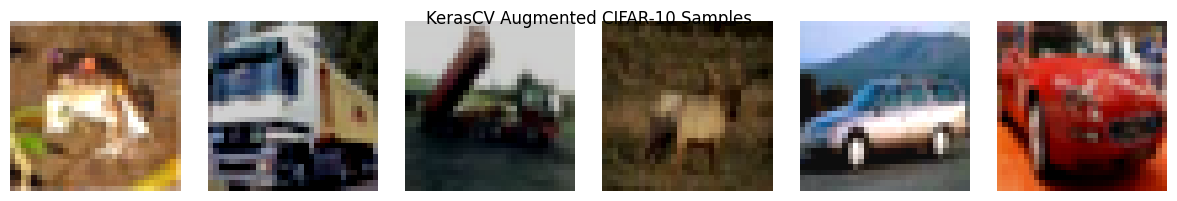

In [4]:
# augmented samples
def preview_augmented(images, augmenter, n=6):
    plt.figure(figsize=(n * 2, 2))
    for i in range(n):
        img = tf.expand_dims(images[i], 0)
        aug_img = augmenter(img)[0]
        plt.subplot(1, n, i + 1)
        plt.imshow(aug_img.numpy())
        plt.axis("off")
    plt.tight_layout()
    plt.suptitle("KerasCV Augmented CIFAR-10 Samples")
    plt.show()

preview_augmented(x_train, data_augmentation)

In [5]:
# define a cnn model with augmentation in input pipeline
def build_model():
    inputs = Input(shape=(32, 32, 3))
    x = data_augmentation(inputs)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()

In [6]:
# train the model
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.1,
          verbose=1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.1837 - loss: 2.1462 - val_accuracy: 0.2698 - val_loss: 1.9017
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.2916 - loss: 1.8582 - val_accuracy: 0.3120 - val_loss: 1.7925
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3262 - loss: 1.7502 - val_accuracy: 0.3562 - val_loss: 1.6905
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3590 - loss: 1.6999 - val_accuracy: 0.3934 - val_loss: 1.6482
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3829 - loss: 1.6566 - val_accuracy: 0.4114 - val_loss: 1.5936
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4037 - loss: 1.6070 - val_accuracy: 0.4188 - val_loss: 1.5738
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4186 - loss: 1.5798 - val_accuracy: 0.4364 - val_loss: 1.5237
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4355 - loss: 1.5330 - val_accuracy:

In [7]:
# evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test accuracy: {acc:.4f}")

✅ Test accuracy: 0.4696
